In [1]:
# import necessary packages
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Rectangle
from matplotlib.ticker import MultipleLocator
plt.style.use('default')
# plt.style.use('dark_background')
%config InlineBackend.figure_format = 'retina'

In [2]:
def plot_xt(x, tau, N):
    """
        Plot the functions x(t), given the time step tau and number of steps N
    """
    fig, ax = plt.subplots(1, 1, figsize=(6,3), sharex=True)
    plt.subplots_adjust(left=0.1, bottom=0.15, right=0.97, top=0.9, 
            wspace=0.3, hspace=0.2)
    ax.set_ylabel(r"$x(t)$")
    ax.set_xlabel(r"$t$")
    tlist = tau * np.arange(0, N)

    ax.scatter(tlist, x, color='blue', label='numerical', s=2)
    # x_exact will be provided later
    ax.plot(tlist, x_exact(tlist), color='red', label='exact')
    ax.legend()
    return fig

In [3]:
def plot_xv(x, v):
    """
        Plot the x-v phase space
    """
    fig, ax = plt.subplots(1, 1, figsize=(5,5), sharex=True);
    plt.subplots_adjust(left=0.1, bottom=0.15, right=0.97, top=0.9, 
            wspace=0.3, hspace=0.2);
    ## adjust axis position
    ax.set_aspect(1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    pltrange = 1.6
    ax.set_xlim(left=-pltrange, right=pltrange)
    ax.set_ylim(bottom=-pltrange, top=pltrange)
    ## axis label
    ax.text(0.94, 0.52, r"$x$", transform=ax.transAxes)
    ax.text(0.52, 0.94, r"$v$", transform=ax.transAxes)
    ## the ellipse of energy conservation
    ax.scatter(x, v, color='blue', s=2, label='numerical', zorder=1)
    ## exact solution
    tlist = np.linspace(0, 6*np.pi, 300)
    xlist = np.array([x_exact(t) for t in tlist])
    ## numerical differentiation
    vlist = np.gradient(xlist, tlist)
    ax.plot(xlist[1:-1], vlist[1:-1], color='red', label='exact', zorder=0)
    ax.legend(loc='upper right')
    return fig

For a body moving under the effect some general force $F(x, v)$,  the equation of motion

$$
\frac{d^2 x(t)}{dt^2} = \frac{1}{m} F(x(t), v(t))
$$

can only be solved numerically. The basic idea is to *discretize* the motion, i.e. separate it into many steps. 

# Euler Algorithm

Let us choose a small time step $\tau$. The kinetic quantities (position, velocity and acceleration) at time $t_n = n \tau$ are denoted by

$$
x_n = x(t_n), \, v_n = v(t_n), \, a_n = a(t_n)
$$

In the time interval $[t_n, t_{n+1}]$, we shall *assume* that the body is moving with the constant acceleration $a_n$, determined by the force at time $t_n$

$$
a_n = \frac{1}{m} F(x_n, v_n)
$$

Then the kinetic quantities at $t_{n+1}$ are updated according to the formulas of uniformly accelerating motion:

$$
\begin{align*}
    x_{n+1} &= x_n + v_n \tau + \frac{1}{2} a_n \tau^2
    \\
    v_{n+1} &= v_n + a_n \tau
\end{align*}
$$

This update algorithm is called **Euler algorithm**. 

In [4]:
def euler(x0, v0, F, tau, N):
    """
        Perform Euler algorithm, given initial values x0, v0, 
        force function F,
        step size tau and total step N
    """
    x = np.zeros(N)
    v = np.zeros(N)
    a = np.zeros(N)
    x[0] = x0
    v[0] = v0
    try:
        # for F(x)
        a[0] = F(x[0]) / m
    except:
        # for F(x,v)
        a[0] = F(x[0], v[0]) / m
    # update
    for n in range(N - 1):
        v[n+1] = v[n] + a[n] * tau
        x[n+1] = x[n] + v[n] * tau + a[n] * tau**2 / 2
        try:
            a[n+1] = F(x[n+1]) / m
        except: 
            a[n+1] = F(x[n+1], v[n+1]) / m
    return x, v, a

# Example 1: Simple Harmonic Oscillator

The position $x(t)$ of a simple harmonic oscillator is described by the differential equation

$$
m \frac{d^2 x}{dt^2} = -k x
$$

We can define the **angular frequency**

$$
\omega = \sqrt{\frac{k}{m}}
$$

then the equation can be written as

$$
\frac{d^2 x}{dt^2} + \omega^2 x = 0
$$

We know that the general solution of this equation is

$$
\begin{align*}
    x(t) &= A \cos (\omega t) + B \sin (\omega t)
    \\
    &= C \cos(\omega t + \varphi)
\end{align*}
$$

The constants $A, B$ are determined by the **initial conditions**:

$$
\begin{align*}
    x(0) &= A
    \\
    v(0) &= -\big[A\omega \sin(\omega t) + B\omega \cos(\omega t) \big]_{t = 0}
    \\ &= -B \omega
\end{align*}
$$

Let us now solve the equation of motion numerically. We take the initial conditions as

$$
x_0 = 1 \qquad v_0 = 0
$$

and set $k = m = 1$ (let us forget about the units now). We shall compare it to the exact solution

$$
x(t) = \cos(\omega t)
$$

In [5]:
# system parameters
k = 1
m = 1
x0 = 1
v0 = 0
# solving parameters
tau = 0.1
N = 190 ## run N steps of update
# exact solution
def x_exact(t):
    return np.cos(t)
def v_exact(t):
    return -np.sin(t)

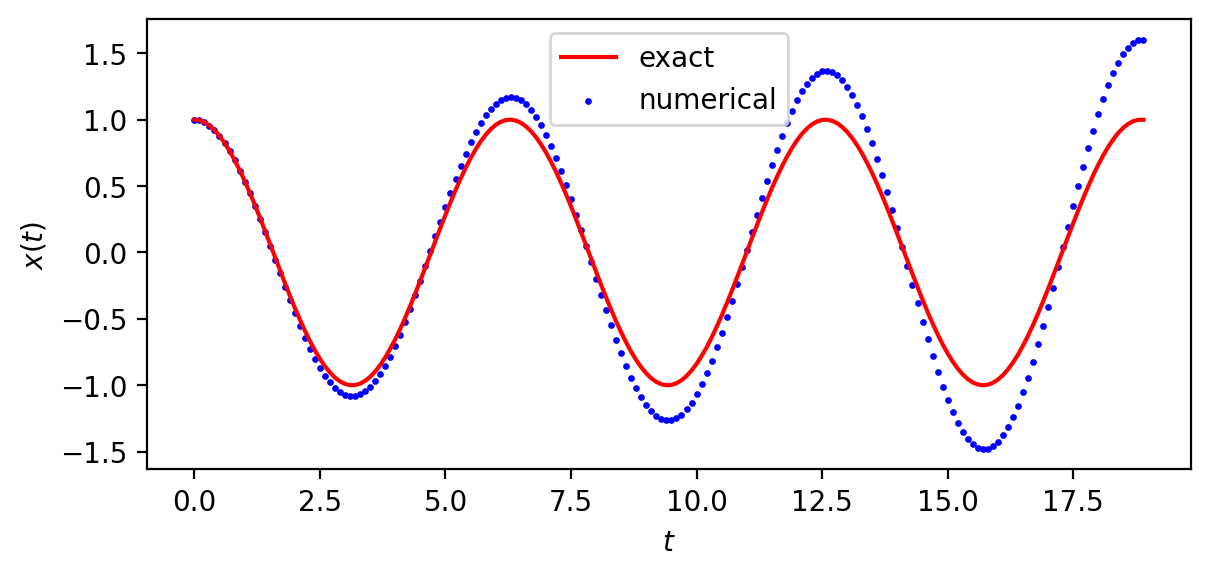

In [6]:
# the force function F(x)
def F_free(x):
    return -k * x
x, v, a = euler(x0, v0, F_free, tau, N)
plot_xt(x, tau, N);

A validity check of our solution is whether it conserves the energy:

$$
\frac{1}{2}m v^2 + \frac{1}{2} k x^2 = E_0
$$

We notice that the oscillation amplitude becomes larger and larger, i.e. the system energy is increasing. 

Another way to visualize is to notice that energy conservation describes an ellipse in the $xv$-plane (called the **phase space (plane)**). The constant $E_0$ is determined from the initial condition

$$
E_0 = \frac{1}{2}m v_0^2 + \frac{1}{2} k x_0^2
$$

Points $(x, v)$ with smaller energy will be inside this ellipse, and those with larger energy will be outside this ellipse. We plot our results in the phase plane:

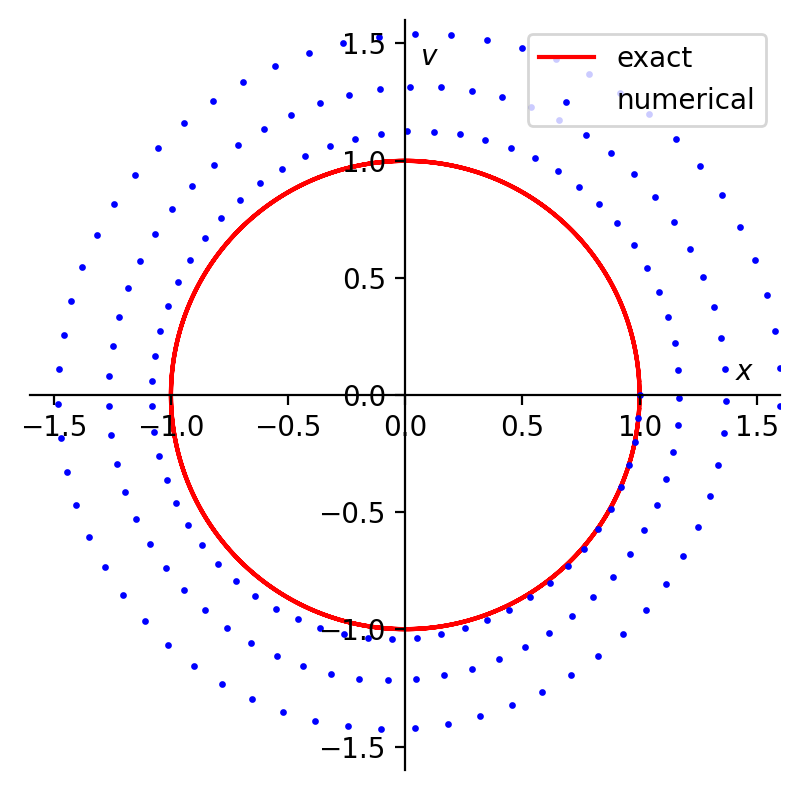

In [7]:
plot_xv(x, v);

We notice that our solution is going farther and farther away from the ellipse of energy conservation. 

# Time-Reversal Symmetry

The failure of Euler algorithm is (at least partly) due to the fact that it breaks the **time-reversal symmetry** (the $T$-symmetry) of Newton's Second Law.

Suppose we reverse the time at $t_0$. Intuitively, under the time reversal

$$
dt \to -dt
$$

Therefore, the equation of motion is not changes, but the initial values of kinetic quantities will transform as

$$
\begin{align*}
    x(t_0) &\to x(t_0) &\quad &\text{(unchanged)}
    \\
    v(t_0) &\to -v(t_0) &\quad &\text{(reverse direction)}
    \\
    a(t_0) &\to a(t_0) &\quad &\text{(unchanged)}
\end{align*}
$$

Let us know examine which part of our algorithm goes wrong. Let us reverse the time at $t_{n+1}$, and perform one step of update:

$$
\begin{align*}
    x'_{n+2} &= x'_{n+1} + v'_{n+1} \tau + \frac{1}{2} a'_{n+1} \tau^2
    \\
    v'_{n+2} &= v'_{n+1} + a'_{n+1} \tau
\end{align*}
$$

The primed quantities corresponds to

$$
x'_{n+1} = x_{n+1} \quad
v'_{n+1} = -v_{n+1} \quad
a'_{n+1} = a_{n+1}
$$

If time-reversal symmetry was kept, we expect that

$$
x'_{n+2} \overset{?}{=} x_{n} \quad
v'_{n+2} \overset{?}{=} -v_{n} \quad
a'_{n+2} \overset{?}{=} a_{n}
$$

which means

$$
\begin{align*}
    x_n &\overset{?}{=} x_{n+1} -v_{n+1} \tau + \frac{1}{2} a_{n+1} \tau^2
    \\
    v_n &\overset{?}{=} v_{n+1} - a_{n+1} \tau
\end{align*}
$$

However, the original update equations tell us that

$$
\begin{align*}
    v_n &= v_{n+1} - a_n \tau
    \\
    x_n &= x_{n+1} - v_n \tau - \frac{1}{2} a_n \tau^2
    \\ &= x_{n+1} - (v_{n+1} - a_n \tau) \tau - \frac{1}{2} a_n \tau^2
    \\ &= x_{n+1} - v_{n+1} \tau + \frac{1}{2} a_{n} \tau^2
\end{align*}
$$

We now realize that the mistake is a biased choice of acceleration: during $[t_n, t_{n+1}]$, the value of acceleration cannot be set as always the value $a_n$ at the beginning.

# Amendment of Euler Algorithm

If you stare at the above equations long enough, you may discover that we can we make a small amendment to the update method of $v$ (while the update method of $x$ is unchanged)

$$
\begin{align*}
    x_{n+1} &= x_n + v_n \tau + \frac{1}{2} a_n \tau^2
    \\
    v_{n+1} &= v_n + \frac{a_n + a_{n+1}}{2} \tau
\end{align*}
$$

then the algorithm will have time-reversal symmetry.

----

*Proof*: Perform time reversal at $t_{n+1}$ and update one step, we obtain

$$
\begin{align*}
    x'_{n+2} &= x'_{n+1} + v'_{n+1} \tau + \frac{1}{2} a'_{n+1} \tau^2
    \\
    v'_{n+2} &= v'_{n+1} + \frac{a'_{n+1} + a'_{n+2}}{2} \tau
\end{align*}
$$

Plugging in the substitution

$$
x'_{n+1} = x_{n+1} \quad
v'_{n+1} = -v_{n+1} \quad
a'_{n+1} = a_{n+1}
\\[1em]
x'_{n+2} = x_{n} \quad
v'_{n+2} = -v_{n} \quad
a'_{n+2} = a_{n}
$$

we obtain

$$
\begin{align*}
    v_n &= v_{n+1} - \frac{a_{n+1} + a_{n}}{2} \tau
    \\
    x_n &= x_{n+1} - v_{n+1} \tau + \frac{1}{2} a_{n+1} \tau^2
\end{align*}
$$

This agrees with the original update formulas:

$$
\begin{align*}
    v_n &= v_{n+1} - \frac{a_n + a_{n+1}}{2} \tau
    \\
    x_n &= x_{n+1} - v_n \tau - \frac{1}{2} a_n \tau^2
    \\ &= x_{n+1} - \left(
        v_{n+1} - \frac{a_n + a_{n+1}}{2} \tau
    \right) \tau - \frac{1}{2} a_n \tau^2
    \\ &= x_{n+1} - v_{n+1} \tau + \frac{1}{2} a_{n+1} \tau^2
    \qquad \blacksquare
\end{align*}
$$

----

The velocity update equation has one subtlety: on the right-hand side

$$
v_{n+1} = v_n + \frac{a_n + a_{n+1}}{2}
$$

the acceleration $a_{n+1}$ may depend on $v_{n+1}$ (e.g. damped oscillator). If this is the case, we should either treat this as an equation of $v_{n+1}$ and (numerically) solve it.

Let us compare the result of the amended Euler algorithm and the exact solution. 

In [8]:
def update_v(v0, x0, x1, F):
    """
        Update v if force F depends on velocity
    """
    def v_eq(v1):
        return v0 - v1 + (1/2/m) * (F(x0, v0) + F(x1, v1)) * tau
    return fsolve(v_eq, v0)[0]

def euler2(x0, v0, F, tau, N):
    """
        Perform amended Euler algorithm, given initial values x0, v0, 
        force function F,
        step size tau and total step N
    """
    x = np.empty(N)
    v = np.empty(N)
    a = np.empty(N)
    x[0] = x0
    v[0] = v0
    try:
        # for F(x)
        a[0] = F(x[0]) / m
    except:
        # for F(x,v)
        a[0] = F(x[0], v[0]) / m
    # update
    for n in range(N - 1):
        # update
        x[n+1] = x[n] + v[n] * tau + a[n] * tau**2 / 2
        try:
            a[n+1] = F(x[n+1]) / m
            v[n+1] = v[n] + (a[n] + a[n+1]) / 2 * tau
        except: 
            v[n+1] = update_v(v[n], x[n], x[n+1], F)
            a[n+1] = F(x[n+1], v[n+1]) / m
    return x, v, a

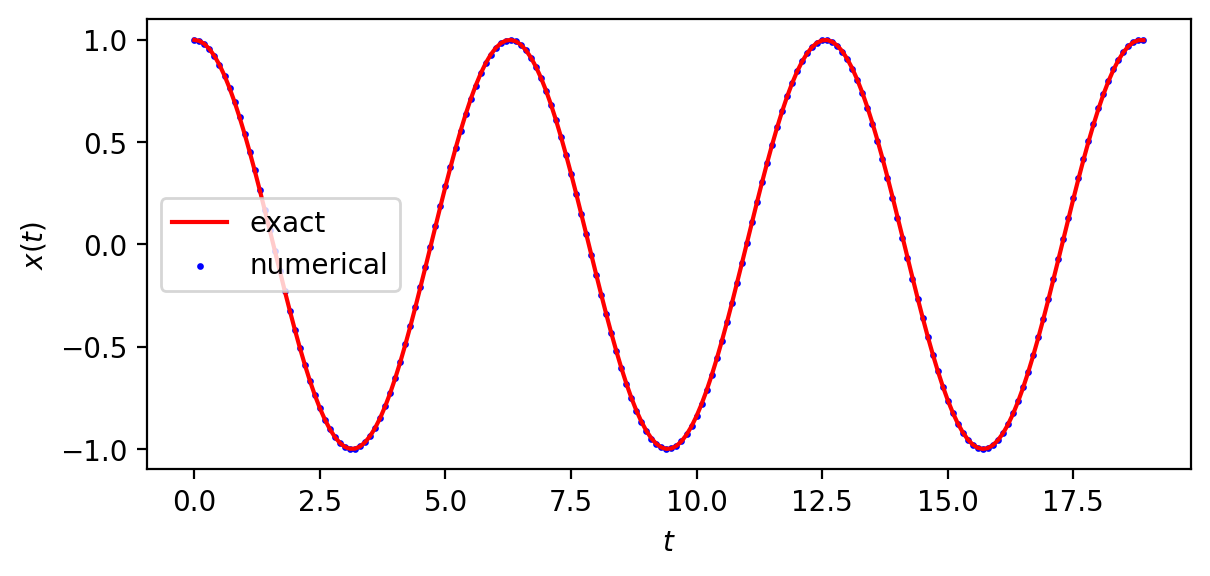

In [9]:
# update
x, v, a = euler2(x0, v0, F_free, tau, N)
plot_xt(x, tau, N);

# Example 2: Harmonic Oscillator with Damping

We also examine the performance of our algorithm in the presence of **damping**. The equation of motion is now

$$
m \frac{d^2 x}{dt^2} = -kx - \alpha v
$$

It turns out that the exact solution of this equation is 

$$
x(t) = e^{-\beta t} (C e^{i\omega t} + C^* e^{-i \omega t})
$$

where $C$ is a complex number to be determined by the initial conditions, and

$$
\beta = \frac{\alpha}{2m}, \quad
\omega = \sqrt{\frac{k}{m} - \frac{\alpha^2}{4m^2}}
$$

Taking the same initial conditions

$$
x_0 = 1, \quad v_0 = 0
$$

we obtain

$$
\begin{align*}
    C &= \frac{1}{2} - i \frac{\beta}{2\omega}
    \\[1em]
    x(t) &= e^{-\beta t} \left(
        \cos(\omega t) + \frac{\beta}{2\omega} \sin(\omega t)
    \right)
\end{align*}
$$

In [10]:
# the force function F(x, v)
# in the following, we take alpha = 0.2
alpha = 0.2
beta = alpha / 2 / m
omega = np.sqrt(k/m - alpha**2 / 4 / m**2)
# exact solution
def x_exact(t):
    return np.exp(-beta * t) * (np.cos(omega * t) + beta / 2 / omega * np.sin(omega * t))    

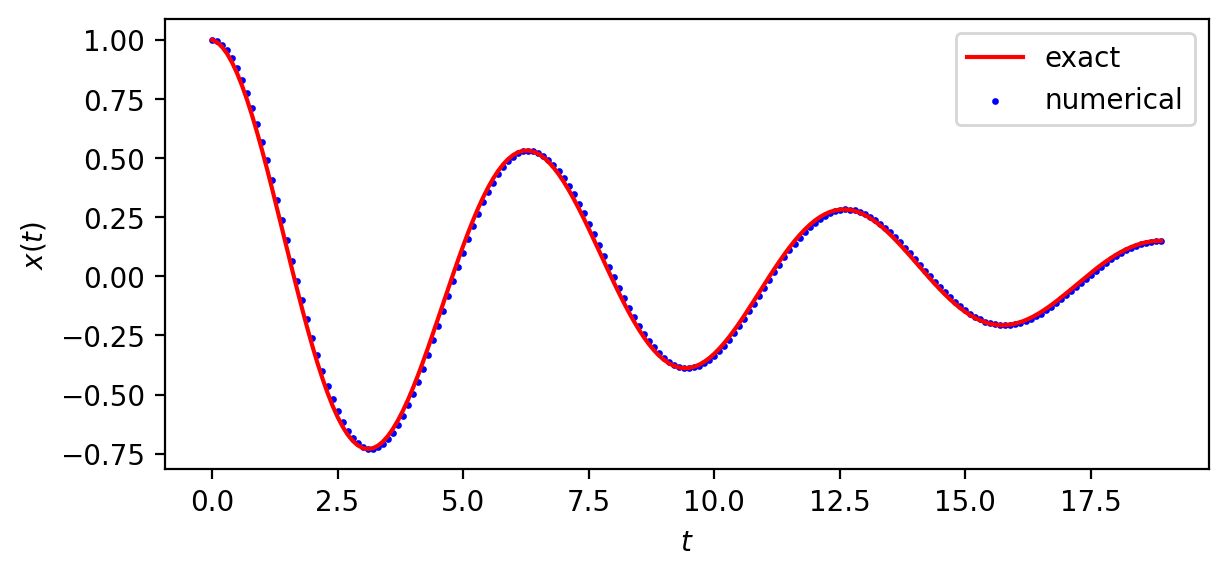

In [11]:
# update
def F_damp(x, v):
    return -k * x - alpha * v
x, v, a = euler2(x0, v0, F_damp, tau, N)
plot_xt(x, tau, N);

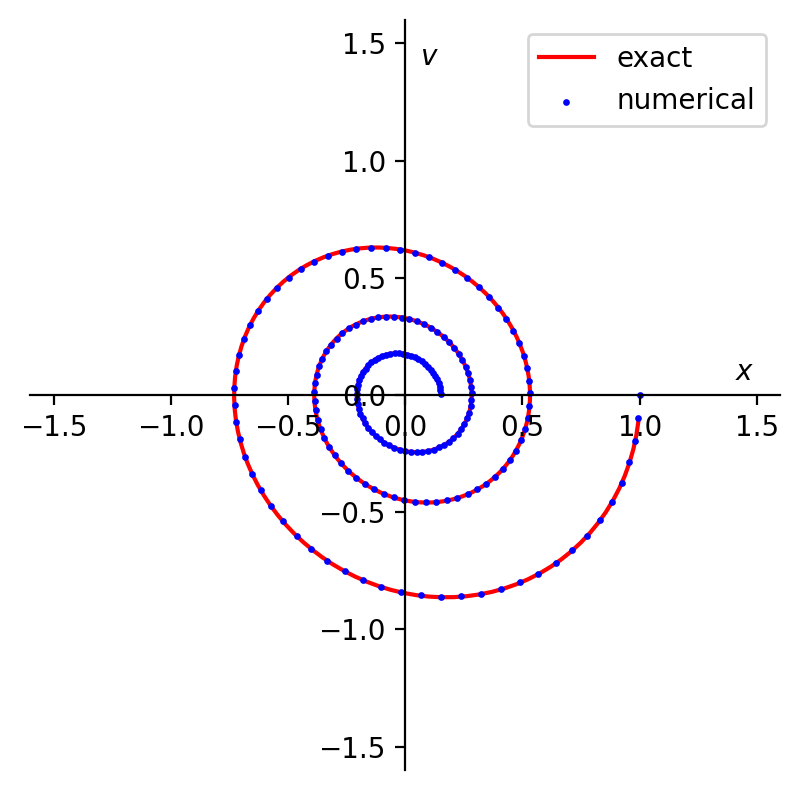

In [12]:
plot_xv(x, v);